## Problem 2: Medical Diagnostics

**2. Now, suppose that the hypothesis space consists of only height 1 decision trees for this data
set (only one attribute split).**



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from tqdm.notebook import tqdm, trange

%matplotlib inline

In [2]:
heart_train = pd.read_csv('heart_train.data', header=None)
heart_test = pd.read_csv('heart_test.data', header=None)

# Changing 0 class to -1 to predict using Sign function
heart_train.loc[heart_train[0] == 0, 0] = -1
heart_test.loc[heart_test[0] == 0, 0] = -1

# Split X, Y
y_train, X_train = heart_train.iloc[:, 0], heart_train.iloc[:, 1:]
y_test, X_test = heart_test.iloc[:, 0], heart_test.iloc[:, 1:]

attributes = X_train.columns
m, n = X_train.shape
classes = y_train.unique()

In [3]:
def generate_1_attr_hypotheses(attributes, classes):
    hypotheses = []
    for l0 in attributes:
        for leaf1 in classes:
            for leaf2 in classes:
                h = {}
                h[l0] = {}
                h[l0][0] = leaf1
                h[l0][1] = leaf2
                hypotheses.append(h)
    return hypotheses

H = generate_1_attr_hypotheses(attributes, classes)
assert len(attributes) * (2**2) == len(H)


**(a) Use coordinate descent to minimize the exponential loss function for this hypothesis
space over the training set. You can use any initialization and iteration order that you
would like other than the one selected by adaBoost. What is the optimal value of α that
you arrived at? What is the corresponding value of the exponential loss on the training
set?**

In [10]:
def predict(X, h):
    for l0 in h.keys():
        val = X[l0]
        pred = h[l0][val]
        if not isinstance(pred, dict):
            return pred
        else:
            for l1 in pred.keys():
                val = X[l1]
                return pred[l1][val]
            

def boosting_predict(a, H=None, x=None, h_x=None):
    if h_x is None:
        h_x = []
        for h in H:
            y_pred = x.apply(lambda row: predict(row, h), axis=1)
            h_x.append(y_pred)
        h_x = np.array(h_x)
    return np.sign(a.dot(h_x))

def accuracy(y_truth, y_pred):
    return np.mean(y_truth == y_pred) * 100

def coordinate_descent(y_train, ht_x, H):
    T = len(H)
    alphas = np.array([1/len(y_train)] * T)
    alpha_change = 1
    changes = []
    iter_counter = 0
    print("Change in alpha: ")
    while alpha_change > 0.01:
        alpha_change = 0
        for t_prime in range(T):
            tmp = np.array(alphas[:])
            tmp[t_prime] = 0
            y_t_prime = np.array(ht_x[t_prime])
            y_t = np.array(ht_x)
            mask = (y_train == y_t_prime)
            loss_n = np.sum(mask * np.exp(-y_train * tmp.dot(y_t)))
            loss_d = np.sum((~mask) * np.exp(-y_train * tmp.dot(y_t)))
            alpha_t_prime = 0.5 * np.log(loss_n / loss_d)
            old_alpha = alphas[t_prime]
            alphas[t_prime] = alpha_t_prime
            alpha_change += abs(alpha_t_prime - old_alpha)
        
        iter_counter += 1
        changes.append(alpha_change)
        if iter_counter % 10 == 0:
            print(f"Iteration {iter_counter} - Alpha difference {alpha_change}")
    return alphas

In [5]:
ht_x = []
for h in H:
    y_pred = X_train.apply(lambda row: predict(row, h), axis=1)
    ht_x.append(y_pred)
ht_x = np.array(ht_x)

In [6]:
alphas = coordinate_descent(y_train, ht_x, H)

Change in alpha: 
Iteration 10 - Alpha difference 0.7157898613298839
Iteration 20 - Alpha difference 0.42098805160270647
Iteration 30 - Alpha difference 0.2939106042233337
Iteration 40 - Alpha difference 0.2284805512187042
Iteration 50 - Alpha difference 0.18791210504579767
Iteration 60 - Alpha difference 0.16070233814860924
Iteration 70 - Alpha difference 0.14117305359578078
Iteration 80 - Alpha difference 0.1261143700744089
Iteration 90 - Alpha difference 0.11411099531368328
Iteration 100 - Alpha difference 0.10429088814982893
Iteration 110 - Alpha difference 0.0962353070727448
Iteration 120 - Alpha difference 0.0894655342628396
Iteration 130 - Alpha difference 0.08362998089641584
Iteration 140 - Alpha difference 0.078494531195247
Iteration 150 - Alpha difference 0.07393380636194959
Iteration 160 - Alpha difference 0.06985807115686238
Iteration 170 - Alpha difference 0.06619514489473755
Iteration 180 - Alpha difference 0.06288632447929013
Iteration 190 - Alpha difference 0.0598834000

In [7]:
import pickle
with open('coor-alpha.pkl', 'wb') as pkl:
    pickle.dump(alphas, pkl)

In [11]:
print("Alpha values")
print(alphas)
loss = np.sum(np.exp(-y_train * alphas.dot(ht_x)))

print("***********************************************************")
print("Training Loss: ", loss)
print("***********************************************************")

Alpha values
[ 0.0125      2.56450499  0.0125      0.9397913   0.0125      0.49712744
  0.0125      0.42087416  0.0125      5.33319822  0.0125      3.43956813
  0.0125     -0.80077938  0.0125     -0.51476228  0.0125     -0.30639216
  0.0125     -0.12937515  0.0125     -0.11811744  0.0125     -0.09058471
  0.0125     -0.59497221  0.0125     -0.30993912  0.0125     -4.91762638
  0.0125     -3.30379305  0.0125      3.63608266  0.0125      2.81664809
  0.0125     -2.40589643  0.0125     -0.90478602  0.0125     -0.37833946
  0.0125     -0.24624989  0.0125      0.46849362  0.0125      0.29120756
  0.0125     -0.78119306  0.0125     -0.3731185   0.0125     -3.07731466
  0.0125     -2.35307728  0.0125     -1.21925251  0.0125     -1.19535567
  0.0125     -0.72422825  0.0125     -0.57953009  0.0125     -3.1952759
  0.0125     -3.13311246  0.0125     -2.37589849  0.0125     -2.35623757
  0.0125     -0.03859159  0.0125     -0.02098391  0.0125     -0.31266444
  0.0125     -0.2022478   0.0125     -0


**(b) What is the accuracy of the resulting classifier on the test data?**


In [12]:
coor_pred = boosting_predict(alphas, H=H, x=X_test)
print("***********************************************************")
print("Coordinate Test Accuracy", accuracy(y_test.ravel(), coor_pred.flatten()))
print("***********************************************************")

***********************************************************
Coordinate Test Accuracy 69.5187165775401
***********************************************************



**(c) What is the accuracy of adaBoost after 20 rounds for this hypothesis space on the test
data?**

In [38]:
def adaboost(H, X_train, y_train):
    m, n = X_train.shape
    w = np.array([1/m] * m)
    alphas = [0] * T
    epsilons = [0] * T
    selected_H = [None] * T
    y_predictions = [None] * T
    best_idxs = []
    print("Running Adaboost")
    for t in range(T):
        e_t = 1
        h_t = None
        y_t = None
        best_i = 0
        h_i = 0
        tq = tqdm(H)
        tq.set_description(f"Round {t+1}")
        for h in tq:
            h_i += 1
            y_pred = X_train.apply(lambda row: predict(row, h), axis=1)
            mask = (y_pred != y_train).astype(np.float64)
            e_h = np.sum(mask * w)
            if e_h < e_t:
                e_t = e_h
                h_t = h
                y_t = y_pred
                best_i = h_i
        print(f"Round {t+1} - Best hypothesis index {best_i}")
        best_idxs.append(best_i)
        selected_H[t] = h_t
        y_predictions[t] = y_t
        epsilons[t] = e_t
        
        a_t = 0.5 * math.log((1-e_t)/e_t) # Log base e
        alphas[t] = a_t
        
        # Weight update
        normalize = 2 * np.sqrt(e_t * (1-e_t))
        w = w * np.exp(-1 * y_train * y_t * a_t)/normalize
    return np.array(alphas), np.array(epsilons), selected_H, np.array(y_predictions), best_idxs

T = 20
a, e, h_, y_, idxs = adaboost(H, X_train, y_train)

Running Adaboost



Round 1 - Best hypothesis index 51



Round 2 - Best hypothesis index 43



Round 3 - Best hypothesis index 1



Round 4 - Best hypothesis index 27



Round 5 - Best hypothesis index 1



Round 6 - Best hypothesis index 31



Round 7 - Best hypothesis index 10



Round 8 - Best hypothesis index 87



Round 9 - Best hypothesis index 1



Round 10 - Best hypothesis index 63



Round 11 - Best hypothesis index 1



Round 12 - Best hypothesis index 79



Round 13 - Best hypothesis index 10



Round 14 - Best hypothesis index 31



Round 15 - Best hypothesis index 1



Round 16 - Best hypothesis index 43



Round 17 - Best hypothesis index 10



Round 18 - Best hypothesis index 15



Round 19 - Best hypothesis index 1



Round 20 - Best hypothesis index 67


In [39]:
pred = boosting_predict(a, H=h_, x=X_test)
print("***********************************************************")
print("AdaBoost Test Accuracy", accuracy(y_test.ravel(), pred.flatten()))
print("***********************************************************")

***********************************************************
AdaBoost Test Accuracy 66.84491978609626
***********************************************************


**(c) How does the α learned by adaBoost compare to the one learned by coordinate descent/gradient
descent?**

$\alpha$ values from adaboost are positive and slowly converge, whereas in the case of coordinate descent $\alpha$ values are eratic with contribution of all the hypothesis. Even for best hypotheses picked by Adaboost, $\alpha$ values of both methods vary diversely.

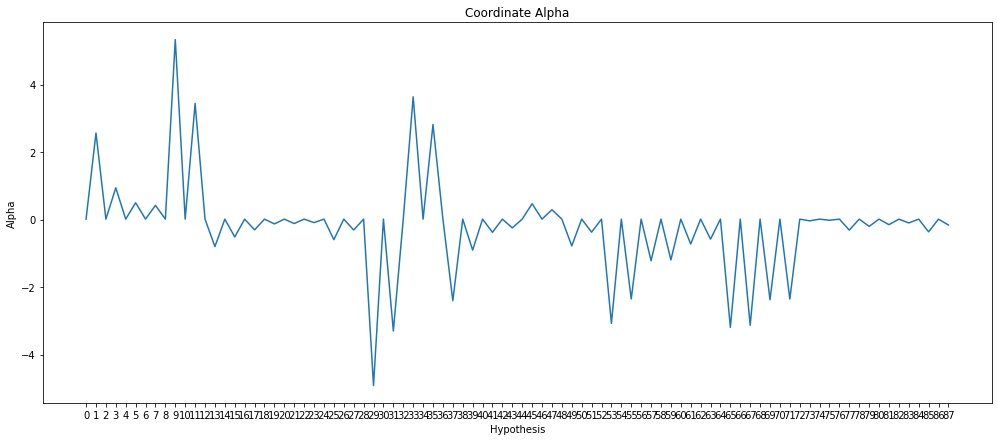

In [90]:
coordinate_alpha = alphas

plt.figure(figsize=(17,7))
plt.title("Coordinate Alpha")
plt.xlabel("Hypothesis")
plt.ylabel("Alpha")
plt.xticks(range(len(coordinate_alpha)))
plt.plot(range(len(coordinate_alpha)), coordinate_alpha)

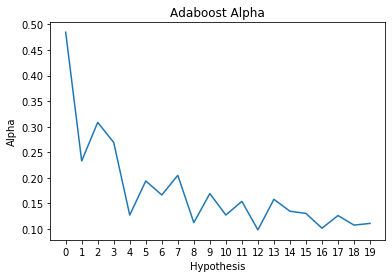

In [81]:
adaboost_alpha = a
plt.title("Adaboost Alpha")
plt.xlabel("Hypothesis")
plt.ylabel("Alpha")
plt.xticks(range(len(adaboost_alpha)))
plt.plot(range(len(adaboost_alpha)), adaboost_alpha)

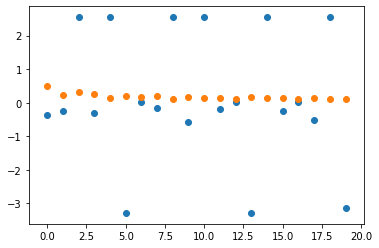

In [97]:
plt.scatter(range(len(coordinate_alpha[idxs])), coordinate_alpha[idxs])
plt.scatter(range(len(adaboost_alpha)), adaboost_alpha)


**(d) Use bagging, with 20 bootstrap samples, to produce an average classifier for this data
set. How does it compare to the previous classifiers in terms of accuracy on the test set?**


In [64]:
def fit_decision_stump(data, attributes):
    m, n = data.shape
    best_accuracy = 0
    best_h = 0
    for h in H:
        y_pred = data.apply(lambda row: predict(row, h), axis=1)
        acc = accuracy(data[0].ravel(), y_pred.ravel())
        if acc > best_accuracy:
            best_accuracy = acc
            best_h = h
    return best_h

In [65]:
B = 20
# Random forest
T = []
attrs = attributes.to_list()
for b in range(B):
    bootstrap_sample = heart_train.iloc[np.random.randint(m, size=m)]
#     T_b, best_split = fit_decision_stump_ig(bootstrap_sample, attrs)
    T_b = fit_decision_stump(bootstrap_sample, attrs)
    T.append(T_b)

In [66]:
from collections import defaultdict 

def stump_predict(T_b, x_row):
    for root in T_b.keys():
        val = x_row[root]
        return T_b[root][val]

def random_forest_predict(T, data):
    m, n = data.shape
    y_pred = np.array([0] * m)
    for i in range(m):
        row = data.loc[i, :]
        preds = defaultdict(int)
        for t_b in T:
            preds[stump_predict(t_b, row)] += 1
        if preds[-1] > preds[1]:
            y_pred[i] = -1
        else:
            y_pred[i] = 1
    return y_pred

test_accuracy = accuracy(random_forest_predict(T, X_test), y_test.ravel()) 

print("***********************************************************")
print("Bagging Test accuracy", test_accuracy)
print("***********************************************************")

***********************************************************
Bagging Test accuracy 61.49732620320856
***********************************************************



**(e) Which of these 3 methods should be preferred for this data set and why**

Adaboost and Coordinate descent methods can be used for this data set with this hypothesis space. Decision stumps are not expressive, so bagging would not be much useful for improving the accuracy. 